In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import image as mp_image

%matplotlib inline

import os

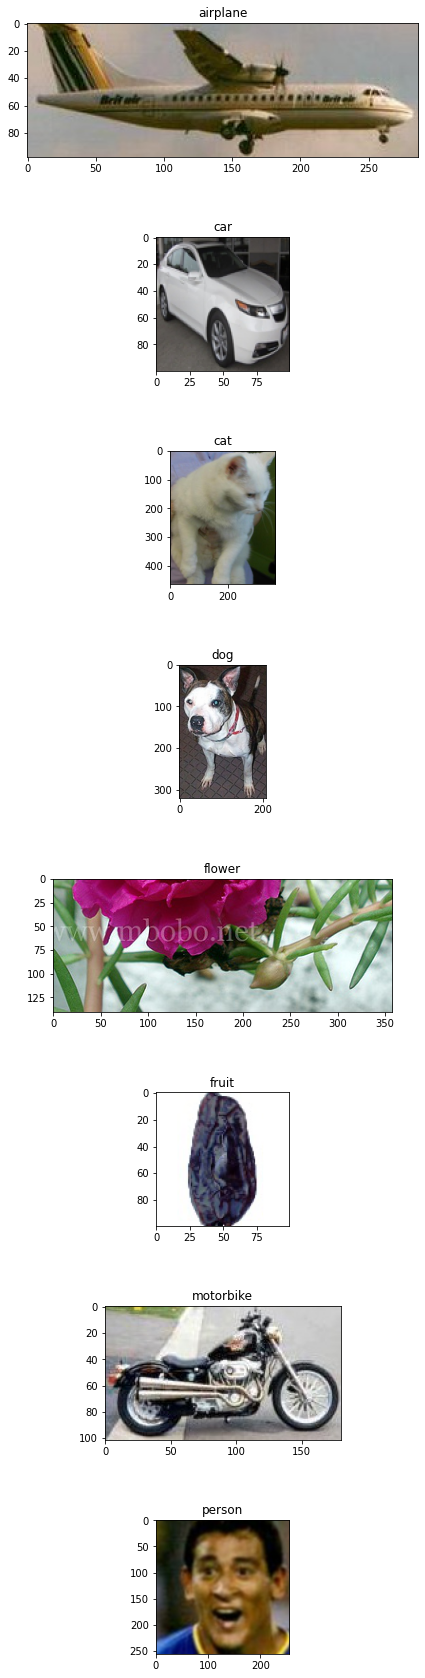

In [2]:
src_folder = '../input/natural-images/data/natural_images'
fig = plt.figure(figsize=(15, 30))                          
                 
for root,folders,filenames in os.walk(src_folder):
    
    image_num = 0
    num_folders = len(folders)
    for folder in sorted(folders):
        image_num += 1
        file_name = os.listdir(os.path.join(root,folder))[5]
        file_path = os.path.join(root,folder,file_name)
        image = mp_image.imread(file_path)
        a = fig.add_subplot(num_folders,1,image_num)
        image_plot = plt.imshow(image)
        a.set_title(folder)
fig.subplots_adjust(hspace=0.6)
plt.show()
                 

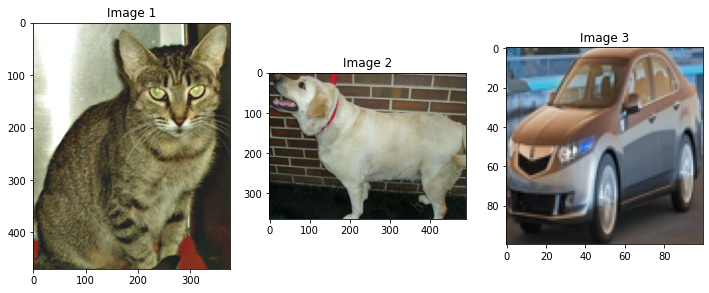

notice the images are of different formats
pil image is of type  <class 'PIL.JpegImagePlugin.JpegImageFile'>
ski image is of type  <class 'numpy.ndarray'>
cv image is of type  <class 'numpy.ndarray'>


now we apply np.array() to the pil image:
type np.array(pil): <class 'numpy.ndarray'>


now we apply Image.fromarray() to the cv and sk image:
type Image.fromarray(cv_image): <class 'PIL.Image.Image'>


shape of a sk_image: (364, 491, 3)
It is a RGB image.


Cv image has different color range, so changing to standard RGB:


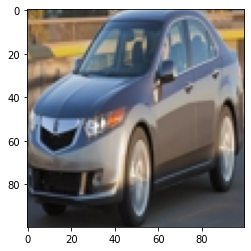

Transforming RGB into grey scale


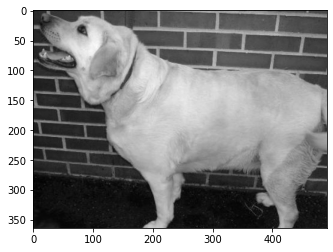

The grey scale image shape is: (364, 491)


In [3]:
from PIL import Image
import skimage as sk
from skimage import io as sk_io 
import cv2

images = []

pil_image = Image.open(os.path.join(src_folder,'cat','cat_0711.jpg'))
images.append(pil_image)

sk_image = sk_io.imread(os.path.join(src_folder,'dog','dog_0673.jpg'))
images.append(sk_image)

cv_image = cv2.imread(os.path.join(src_folder,'car','car_0200.jpg'))
images.append(cv_image)

fig = plt.figure(figsize=(12,12))

image_num = 0
num_images = len(images)

for image_idx in range(num_images):
    a = fig.add_subplot(1,num_images,image_idx+1)
    image_plot = plt.imshow(images[image_idx])
    a.set_title("Image "+str(image_idx+1))
plt.show()
    
print('notice the images are of different formats')    
print('pil image is of type ',type(pil_image)) 
print('ski image is of type ',type(sk_image))
print('cv image is of type ',type(cv_image))

print('\n')

print('now we apply np.array() to the pil image:')
print('type np.array(pil):',type(np.array(pil_image)))
print('\n')

print('now we apply Image.fromarray() to the cv and sk image:')
print('type Image.fromarray(cv_image):',type(Image.fromarray(cv_image)))
print('\n')

print('shape of a sk_image:',sk_image.shape)
print('It is a RGB image.')
print('\n')
      
print('Cv image has different color range, so changing to standard RGB:')

cv_image_rgb = cv2.cvtColor(cv_image,cv2.COLOR_BGR2RGB)
plt.imshow(cv_image_rgb)
plt.show()
      
print('Transforming RGB into grey scale')
sk_gray_image = sk.color.rgb2gray(sk_image)
plt.imshow(sk_gray_image,'gray')
plt.show()
      
print('The grey scale image shape is:',sk_gray_image.shape)
      
      

rotating images 

rotating image using Pil:


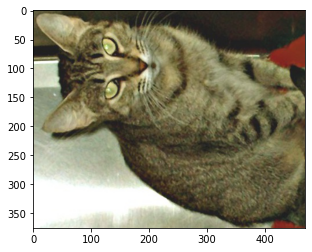

rotating using skimage.transform.rotate


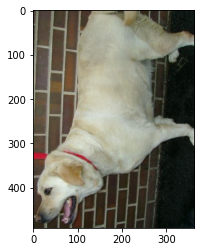

In [4]:
print('rotating images \n')
print('rotating image using Pil:')
rotated_pil = pil_image.rotate(90,expand=1)
plt.imshow(rotated_pil)
plt.show()

print('rotating using skimage.transform.rotate')
from skimage import transform as sk_transform
rotated_sk = sk_transform.rotate(sk_image,90,resize=True)
plt.imshow(rotated_sk)
plt.show()

flipping images



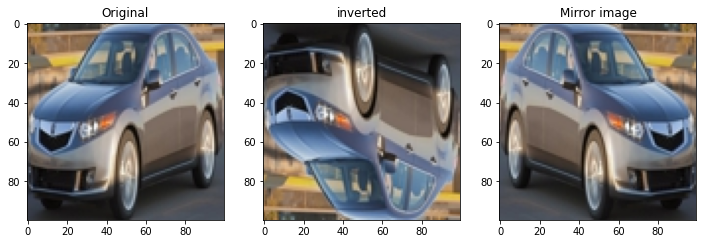

In [5]:
print('flipping images\n')
import numpy as np

upsidedown = np.flip(cv_image_rgb,axis=0)
mirrored = np.flip(cv_image_rgb,axis=1)

fig = plt.figure(figsize = (12,12))
a = fig.add_subplot(1,3,1)
image_plot_1 = plt.imshow(cv_image_rgb)
a.set_title('Original')
a = fig.add_subplot(1,3,2)
image_plot_1 = plt.imshow(upsidedown)
a.set_title('inverted')
a = fig.add_subplot(1,3,3)
image_plot_1 = plt.imshow(mirrored)
a.set_title('Mirror image')
plt.show()


rescaling
Original size: 376 by 470
New size: 120 by 150


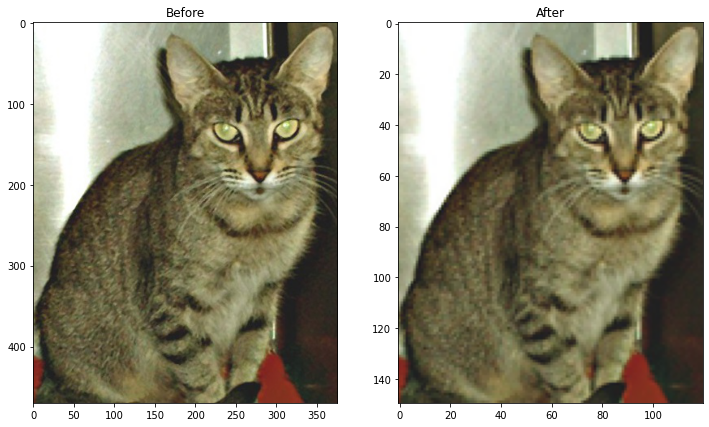

In [6]:
print('rescaling')
from PIL import Image,ImageOps

ooh,oow = pil_image.size
print('Original size:',ooh,'by',oow)
target_size = (150,150)
resized_img = pil_image.copy()
resized_img.thumbnail(target_size,Image.Resampling.LANCZOS)
nnh,nnw = resized_img.size
print('New size:',nnh,'by',nnw)

fig = plt.figure(figsize=(12,12))
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(pil_image)
a.set_title('Before')
a=fig.add_subplot(1,2,2)
imgplot=plt.imshow(resized_img)
a.set_title('After')
plt.show()

resizing
Original size: 376 by 470
New size: 150 by 150


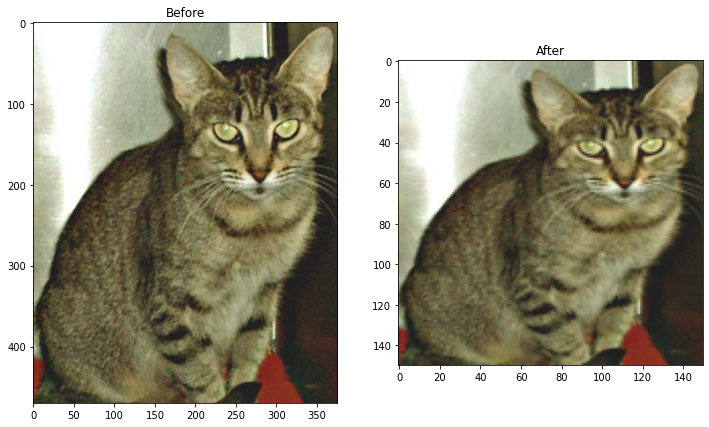

In [7]:
print ('resizing')
ooh,oow = pil_image.size
print('Original size:',ooh,'by',oow)
target_size = (150,150)

new_img = pil_image.resize(target_size)
nnh,nnw = new_img.size
print('New size:',nnh,'by',nnw)

fig = plt.figure(figsize=(12,12))
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(pil_image)
a.set_title('Before')
a=fig.add_subplot(1,2,2)
imgplot=plt.imshow(new_img)
a.set_title('After')
plt.show()